# Environment setup

### Library preparation

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import pandas as pd
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)

import numpy as np

import os

import matplotlib.pyplot as plt

import qcodes as qc
from qcodes.dataset.plotting import plot_by_id, get_data_by_id, plot_dataset
from qcodes.dataset.data_set import load_by_id
from qcodes.instrument.parameter import Parameter


from si_prefix import si_format as SI

In [3]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df

from JJformulas import *
from meas_util import *

from JJmeasurement import *

C:\ProgramData\Anaconda3\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'
C:\ProgramData\Anaconda3\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### Database ini

In [4]:
SAMPLE = 'D053N4'

jj = JJmeas(sample = SAMPLE)

jj.db_connect()

# Sample discription and runid matrix

In [6]:
show_df(full_table, 
         find = SAMPLE
         )

NameError: name 'full_table' is not defined

# Import from origin

In [7]:
Vmock = Parameter(name = 'Voltage', label = 'Voltage', unit = 'V')
Imock = Parameter(name = 'Current', label = 'Current', unit = 'A')

<IPython.core.display.Javascript object>


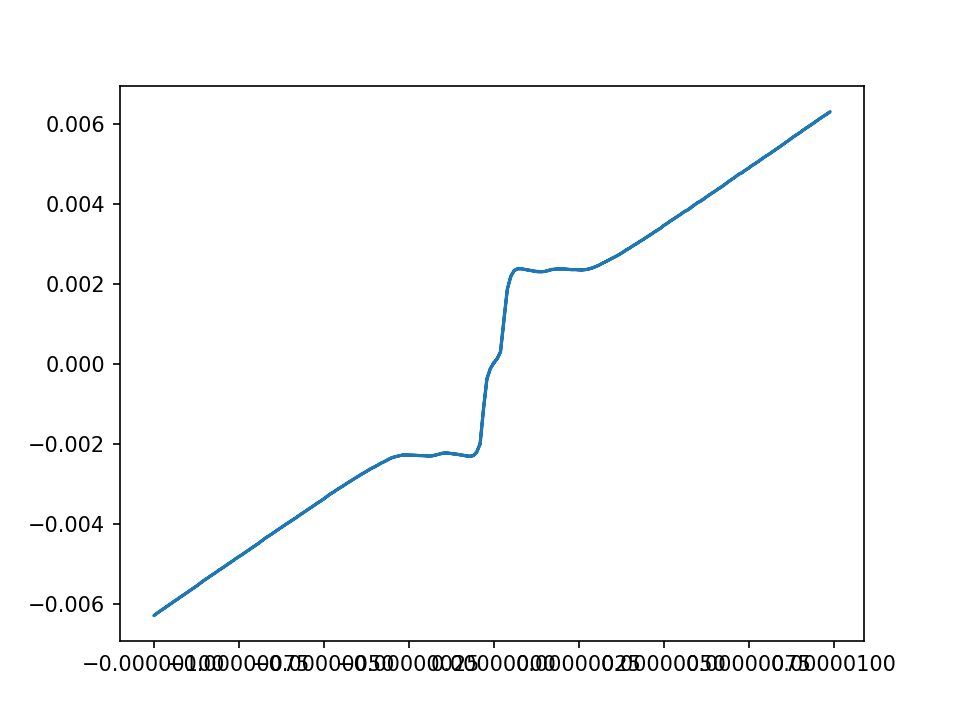

In [8]:
x, y = read_opj_data(cols = (4,5), preprint = True)

In [9]:
runid = jj.mock_meas( x = (Imock, x), y = (Vmock, y) , label = 'IVC cooarse')


Upgrading database; v0 -> v1: : 0it [00:00, ?it/s]
Upgrading database; v1 -> v2: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00, 102.33it/s]
Upgrading database; v2 -> v3: : 0it [00:00, ?it/s]
Upgrading database; v3 -> v4: : 0it [00:00, ?it/s]
Upgrading database; v4 -> v5: 100%|██████████████████████████████████████████████████████| 1/1 [00:00<00:00, 99.36it/s]
Upgrading database; v5 -> v6: : 0it [00:00, ?it/s]
Upgrading database; v7 -> v8: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00, 149.83it/s]
Starting experimental run with id: 1


# Report

## Overview IVC

<IPython.core.display.Javascript object>


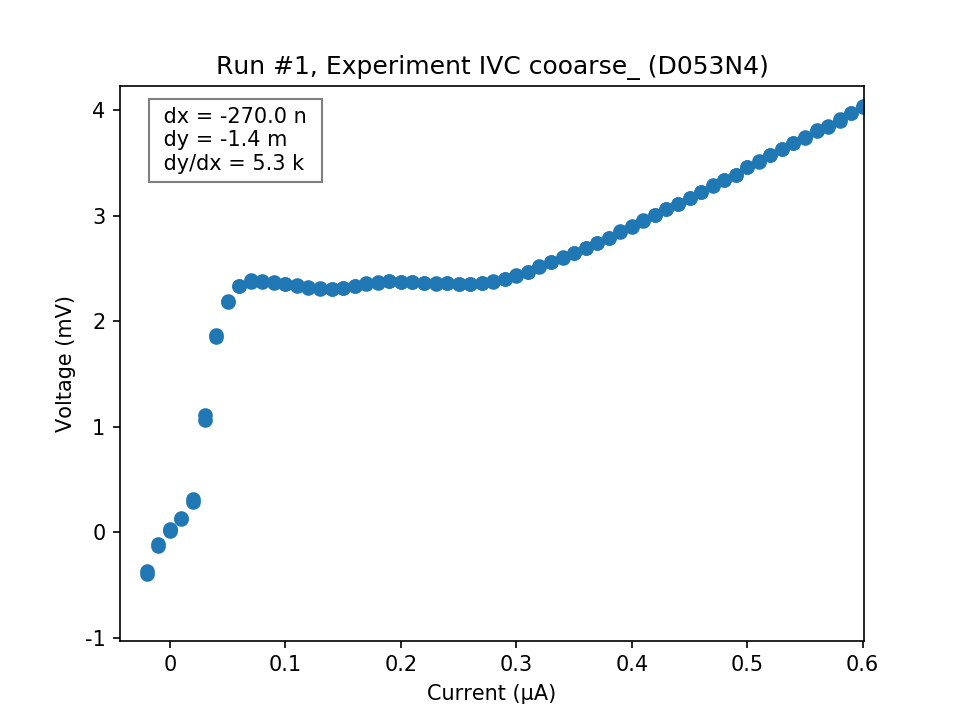

In [10]:
pbi(1, interactive = True)

**Vg = 6.5mV**

**N = 30** 

**Rn_tot = 8.9k**


In [5]:
Vg = 2.418e-3
Rn_tot = 5.3e3

## IVC fine scan

<IPython.core.display.Javascript object>


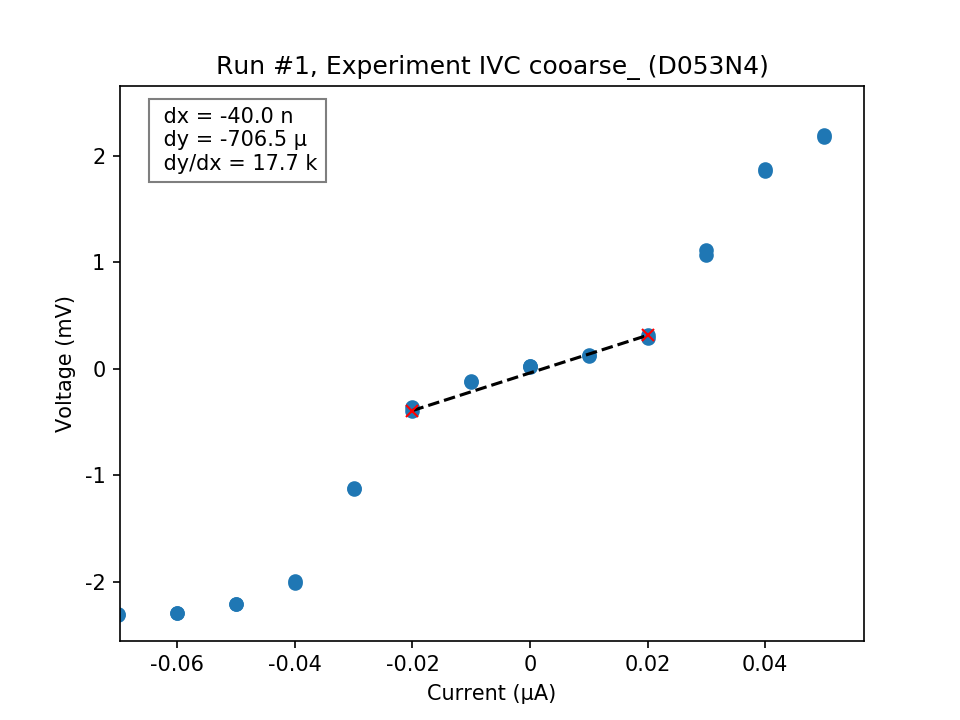

In [12]:
pbi(1, interactive = True)

In [6]:
Ro_tot = 17.7e3
Isw = 20e-9
N  = 30
Vo_tot = 353e-6

# Datatable update

In [7]:
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)

show_df(ft, 
         find = SAMPLE
         )

In [8]:
ft = update_df(ft, SAMPLE, 
         
              {'Rn_tot'  : Rn_tot,
               'Ro_tot'  : Ro_tot,
               'Isw'     : Isw,
               'N'       : N,
               'Vo_tot'  : Vo_tot,
               'Npar'    : 2,
               'dsgn'    : 'Fin',
               'Ajj'     : 40e-15,
               'status'  : 'measd_lv'
             })

show_df(ft, 
       find = SAMPLE)

In [10]:
ft.to_excel("..\chain table.xlsx")
pd.read_excel("..\chain table.xlsx", index_col = 0)

Vo_tot   Rn_tot     Isw  Ro_tot    RoFF   N  Npar dsgn    Ajj  \
D053N2        1.6m     8900   90.6n   734.0     NaN  30     2  Fin  40.0f   
D055B1N9      1.7m   115000  153.0p    1.0M  666.8M  20     2  Fin  40.0f   
D059B6N3      1.9m    84300    2.0n   78.8k   25.9M  20     2  Fin  40.0f   
D059B0N1    217.8u     8750    3.9n    1.3k    1.6G   2     2  Fin  40.0f   
D059BBN2      1.4m  1750000  320.0f  236.7M  903.2M  20     2  Fin  40.0f   
D062B3N2      2.5m   993000   21.0p    4.3M  893.1M  20     2  Fin  40.0f   
D060B2N6      3.3m   664000    1.2p   22.9M  958.7M  20     2  Fin  40.0f   
D060B2N2    318.6u   119000    2.7p   29.1M  920.9M   4     2  Fin  40.0f   
D063BAN6_b    5.0m   594000   20.0p    7.7M  935.0M  30     2  x_s  40.0f   
D063BAN6_a    3.1m   585000   22.0p  265.0k   13.8M  30     2  x_s   4.0p   
D066B8N5_b    1.7m    66100    5.4n   851.0  146.3M  30     2  x_s  40.0f   
D070B1N0       NaN   168000  160.0p   23.7k     NaN  15     2  x_L   4.0p   
D079N6      164.5u     1450  137.0n     2.2     NaN   1     2  x_L   3.7p   
D079N5        2.0m    23300    5.6n  -307.0     NaN  15     2  x_L   3.7p   
D074N4        2.0m    13500    9.0n     1.0     NaN   9     2  x_L   2.2p   
D078N0        1.9m   254000   37.1p   10.0k     NaN  15     2  x_L   4.0p   
D078N5       96.8u    16700  800.0p  100.0k     NaN   1     2  x_L   4.0p   
D059BBN1      0.0y   745000  600.0f  240.0M     NaN  30     2  x_L   4.0p   
D059BBN2_n    0.0y  1950000     NaN     NaN     NaN  30     2  x_L  22.5f   
D059BBN8      0.0y  1780000  750.0f   50.0M     NaN  30     2  x_L   4.0p   
D053N4      353.0u     5300   20.0n   17.7k     NaN  30     2  Fin  40.0f   
D053N7      333.0u    10000   10.0n   33.3k     NaN  30     2  Fin  40.0f   

              status     Rn      Ro      Ec      Ej     Iab      wp  
D053N2      measd_lv  296.7    24.5  185.9m    22.8  958.2n     5.8  
D055B1N9        fabd   5.8k   50.3k  185.9m     1.2   49.4n     1.3  
D059B6N3        fabd   4.2k    3.9k  185.9m     1.6   67.4n     1.5  
D059B0N1        fabd   4.4k   657.0  185.9m     1.5   65.0n     1.5  
D059BBN2        fabd  87.5k   11.8M  185.9m   77.4m    3.2n  339.4m  
D062B3N2        fabd  49.6k  216.0k  185.9m  136.5m    5.7n  450.5m  
D060B2N6        fabd  33.2k    1.1M  185.9m  204.1m    8.6n  551.0m  
D060B2N2        fabd  29.8k    7.3M  185.9m  227.8m    9.6n  582.0m  
D063BAN6_b      fabd  19.8k  257.2k  185.9m  342.2m   14.4n  713.4m  
D063BAN6_a      fabd  19.5k    8.8k    2.3m  347.5m   14.6n   79.4m  
D066B8N5_b      fabd   2.2k    28.4  185.9m     3.1  129.0n     2.1  
D070B1N0       measd  11.2k    1.6k    2.3m  605.0m   25.4n  104.8m  
D079N6         measd   1.4k     2.2    2.4m     4.7  196.0n  301.0m  
D079N5          fabd   1.6k   -20.5    2.4m     4.4  183.0n  290.8m  
D074N4         measd   1.5k  111.1m    4.0m     4.5  189.5n  380.1m  
D078N0         measd  16.9k   666.7    2.3m  400.1m   16.8n   85.2m  
D078N5         measd  16.7k  100.0k    2.3m  405.7m   17.0n   85.8m  
D059BBN1        fabd  24.8k    8.0M    2.3m  272.9m   11.4n   70.4m  
D059BBN2_n      fabd  65.0k     NaN  309.9m  104.2m    4.4n  508.4m  
D059BBN8        fabd  59.3k    1.7M    2.3m  114.2m    4.8n   45.5m  
D053N4      measd_lv  176.7   590.0  185.9m    38.4    1.6u     7.6  
D053N7      measd_lv  333.3    1.1k  185.9m    20.3  852.8n     5.5